# Polynomial Regression

## Importing the libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns 

## Importing the dataset

In [73]:
df = pd.read_csv("Position_Salaries.csv")
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


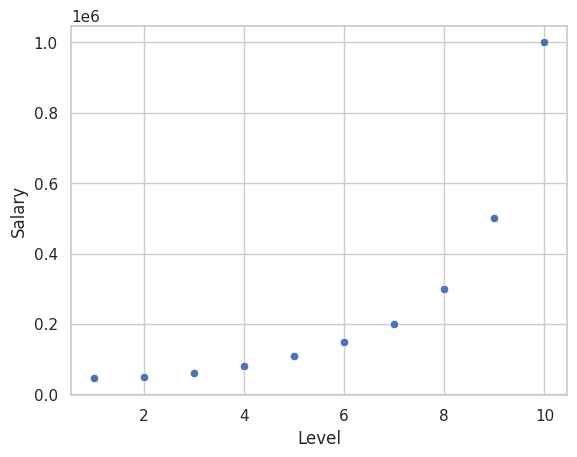

In [34]:
data = df.iloc[:, 1:]

sns.set(style='whitegrid')
sns.scatterplot( x="Level", y="Salary", data=data,)
plt.show()

## Training the Linear Regression model on the whole dataset

In [35]:

#creating a linear regresion model for comparison purposes 
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [50]:
poly_reg = PolynomialFeatures (degree=5)
X_poly = poly_reg.fit_transform(X)
lin_reg_2=LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression()

## Visualising the Linear Regression results

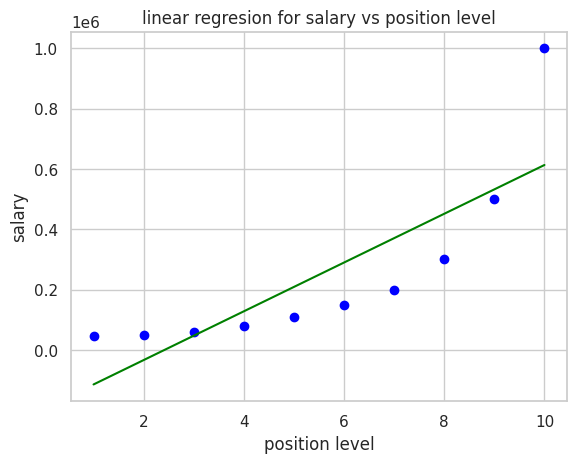

In [51]:
plt.scatter(X,y, color = 'blue')
plt.plot(X,lin_reg.predict(X), color = 'green')
plt.title('linear regresion for salary vs position level')
plt.xlabel('position level')
plt.ylabel('salary')
plt.show()

## Visualising the Polynomial Regression results

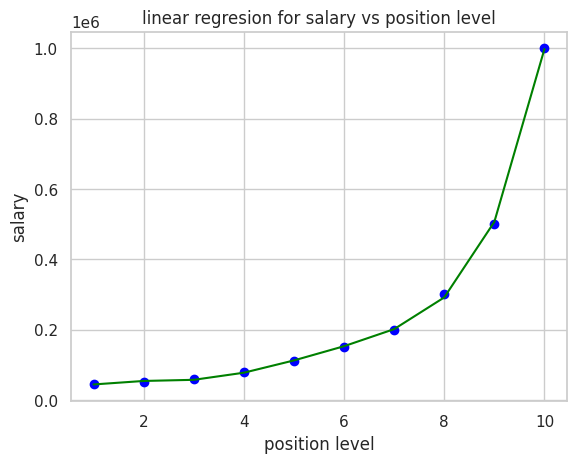

In [52]:
plt.scatter(X,y, color = 'blue')
plt.plot(X,lin_reg_2.predict(X_poly), color = 'green')
plt.title('linear regresion for salary vs position level')
plt.xlabel('position level')
plt.ylabel('salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

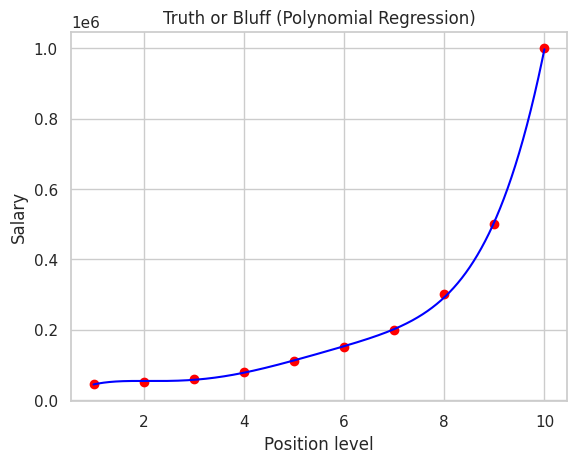

In [59]:
#improving the resolution of the graph
X_grid = np.arange(min(X), max(X), 0.001)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [60]:
lin_reg.predict([[6.5]])

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [67]:
a = poly_reg.fit_transform([[6.5]])
a

array([[1.00000000e+00, 6.50000000e+00, 4.22500000e+01, 2.74625000e+02,
        1.78506250e+03, 1.16029062e+04]])

In [81]:
pred_val = lin_reg_2.predict(poly_reg.fit_transform([[6]]))
X_6 = df.iloc[5:6, -1].values

print("real", X_6, "predecido", pred_val)

real [150000] predecido [152736.59673702]


In [82]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))


array([174878.07765173])